In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
plt.style.use('ggplot')

This notebook compares the winning percentages of the switch vs. no switch strategy in the Monty Hall problem. I will explore the game with 3, 5, 10, 100 doors and calculating the average winning percentages over 1000 trails.

In [2]:
def monty(switch, n_doors):
    """
    A function that returns 0 (lose) or 1 (win) based on how many doors
    there are in the game and if the contestant chooses to switch doors.
    """
    car = random.randint(1, n_doors)
    first_pick = random.randint(1, n_doors)
    
    if switch:
        if car==first_pick:
            return(0)
        else:
            return(1) 
    else: 
        if car==first_pick:
            return(1)
        else:
            return(0)

In [3]:
def monty_simulation(switch, n_doors, n_trials):
    """
    A function that returns a dataframe containing the n_trial results
    of the Monty Hall problem given the number of doors and if the 
    contestant chooses to switch doors.
    """
    
    results = {}
    
    for trial in range(n_trials):
        results[trial+1] = monty(switch, n_doors)
    
    df = pd.DataFrame(list(results.items()), columns=['trial_num', 'result'])
    df["cum_win_sum"] = df['result'].cumsum()
    df["cum_win_pct"] = (df["cum_win_sum"]/df['trial_num']*100).round(2)
    
    if switch:
        df["strategy"] = "switch"
    else:
        df['strategy'] = "stay"
    
    df["n_doors"] = n_doors
    
    return df[["trial_num", "strategy", "n_doors", "cum_win_pct"]]

In [4]:
random.seed(8888)

In [5]:
# 3 doors, 1000 trials
t3_switch = monty_simulation(True, 3, 1000)
t3_stay = monty_simulation(False, 3, 1000)

In [6]:
# 5 doors, 1000 trials
t5_switch = monty_simulation(True, 5, 1000)
t5_stay = monty_simulation(False, 5, 1000)

In [7]:
# 10 doors, 1000 trials
t10_switch = monty_simulation(True, 10, 1000)
t10_stay = monty_simulation(False, 10, 1000)

In [8]:
# 100 doors, 1000 trials
t100_switch = monty_simulation(True, 100, 1000)
t100_stay = monty_simulation(False, 100, 1000)

Text(0.5, 1.0, 'Monty Hall Trials (3 doors)')

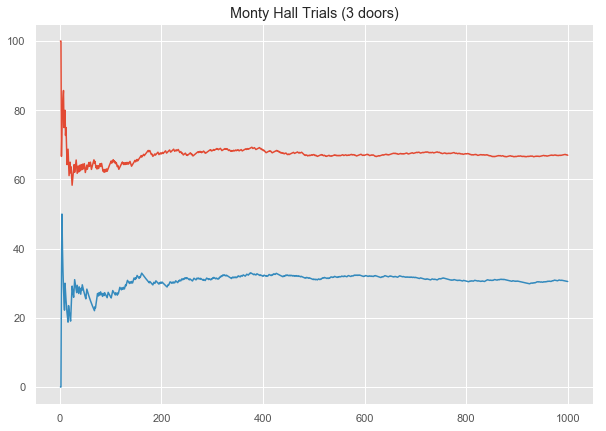

In [9]:
plt.figure(figsize=(10,7))
plt.plot(t3_switch['trial_num'],t3_switch['cum_win_pct'])
plt.plot(t3_stay['trial_num'],t3_stay['cum_win_pct'])
plt.title("Monty Hall Trials (3 doors)")

Text(0.5, 1.0, 'Monty Hall Trials (5 doors)')

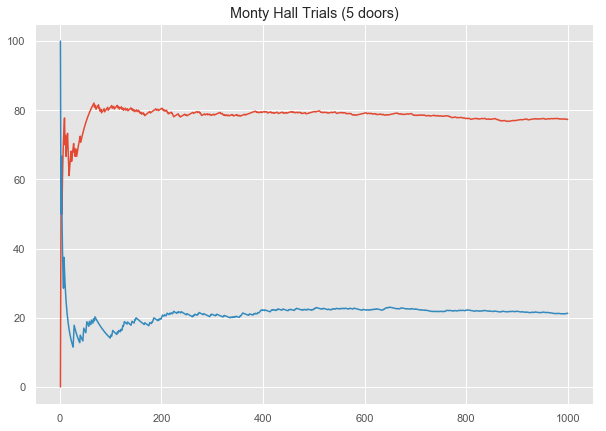

In [10]:
plt.figure(figsize=(10,7))
plt.plot(t5_switch['trial_num'],t5_switch['cum_win_pct'])
plt.plot(t5_stay['trial_num'],t5_stay['cum_win_pct'])
plt.title("Monty Hall Trials (5 doors)")

Text(0.5, 1.0, 'Monty Hall Trials (10 doors)')

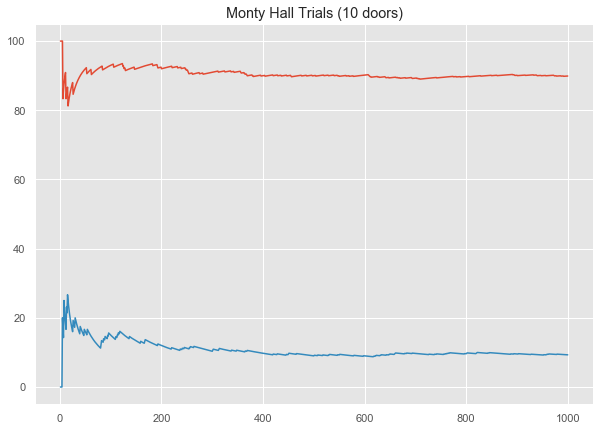

In [11]:
plt.figure(figsize=(10,7))
plt.plot(t10_switch['trial_num'],t10_switch['cum_win_pct'])
plt.plot(t10_stay['trial_num'],t10_stay['cum_win_pct'])
plt.title("Monty Hall Trials (10 doors)")

Text(0.5, 1.0, 'Monty Hall Trials (100 doors)')

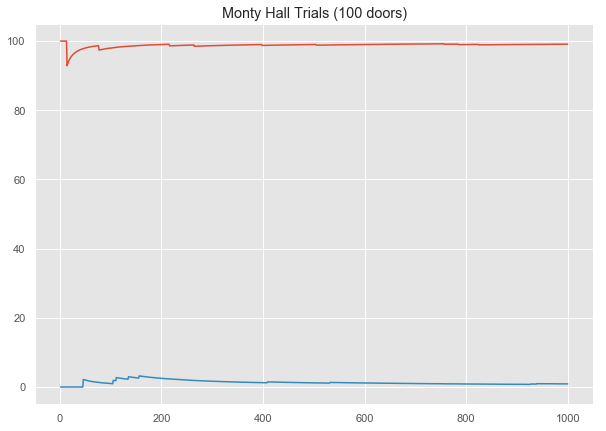

In [12]:
plt.figure(figsize=(10,7))
plt.plot(t100_switch['trial_num'],t100_switch['cum_win_pct'])
plt.plot(t100_stay['trial_num'],t100_stay['cum_win_pct'])
plt.title("Monty Hall Trials (100 doors)")

In [13]:
data = [t3_switch, t3_stay,
        t5_switch, t5_stay,
        t10_switch, t10_stay,
        t100_switch, t100_stay]

In [14]:
t3_switch.head()

,trial_num,strategy,n_doors,cum_win_pct
0,1,switch,3,100.00
1,2,switch,3,100.00
2,3,switch,3,66.67
3,4,switch,3,75.00
4,5,switch,3,80.00


In [16]:
for idx, val in enumerate(data):
    if idx == 0:
        monty_hall = val
    else:
        monty_hall = pd.concat([monty_hall, val])

In [17]:
monty_hall.head()

,trial_num,strategy,n_doors,cum_win_pct
0,1,switch,3,100.00
1,2,switch,3,100.00
2,3,switch,3,66.67
3,4,switch,3,75.00
4,5,switch,3,80.00


In [18]:
monty_hall.to_csv('../data/monty_hall_problem.csv',index=False)